11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 7s 7ms/step - loss: 0.0503 - val_loss: 0.0232
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0178 - val_loss: 0.0131
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0109 - val_loss: 0.0086
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0077 - val_loss: 0.0064
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 10/50
235/235 [==============

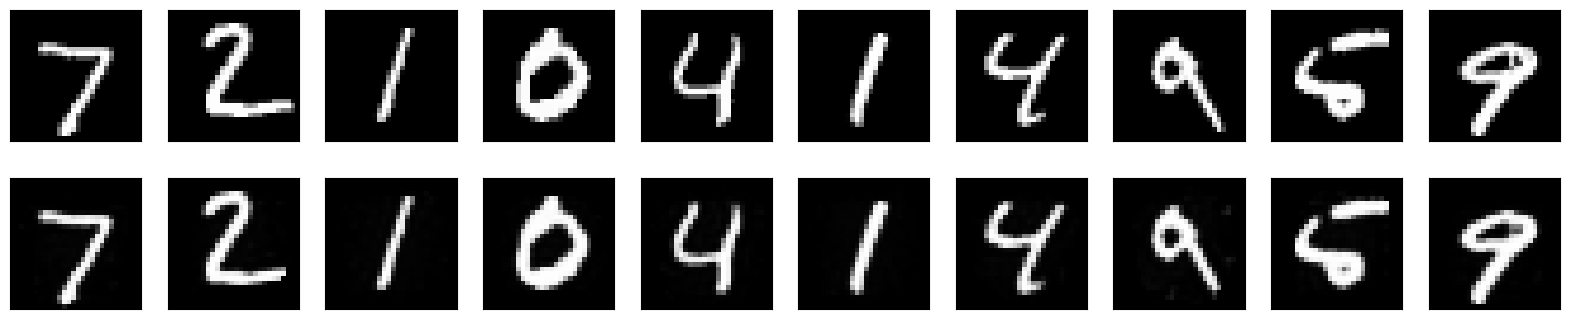

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Create a simple autoencoder
input_layer = Input(shape=(784,))  # Input shape for MNIST dataset (28x28 pixels)
encoded = Dense(128, activation='relu')(input_layer)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Load your dataset (e.g., MNIST)
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Preprocess the data (flatten and scale)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some images
encoded_imgs = autoencoder.predict(x_test)

# Visualize the results
import matplotlib.pyplot as plt

n = 10  # How many digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
